# SUV DATA ANALYSIS

In [1]:
#Required models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Suv_Dataset=pd.read_csv('D:\\suv_data.csv')

In [3]:
Suv_Dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
Suv_Dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
#No of passanger in the original Data
print(len(Suv_Dataset.index))

400


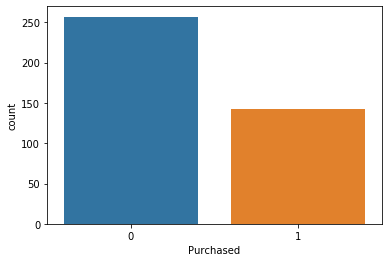

In [6]:
#comparing purchased and not purchased 
sns.countplot(x='Purchased',data=Suv_Dataset)

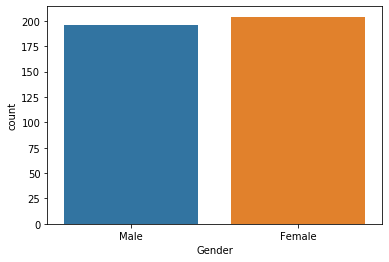

In [7]:
#Comparing Gender over dataset
sns.countplot(x='Gender',data=Suv_Dataset)

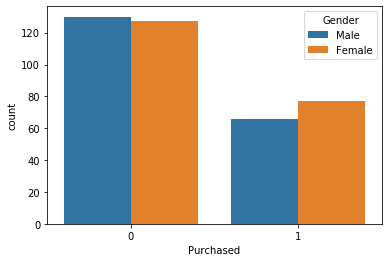

In [8]:
#comparing gender over Purchased.
sns.countplot(x='Purchased',hue='Gender',data=Suv_Dataset)

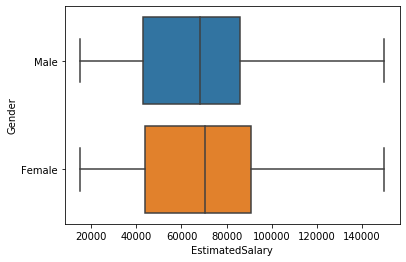

In [9]:
sns.boxplot(x='EstimatedSalary',y='Gender',data=Suv_Dataset)

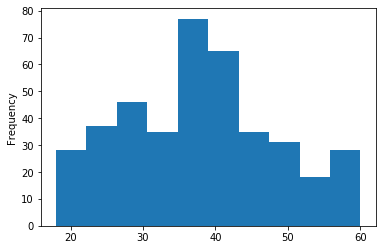

In [10]:
#comparing count of age range
Suv_Dataset['Age'].plot.hist()

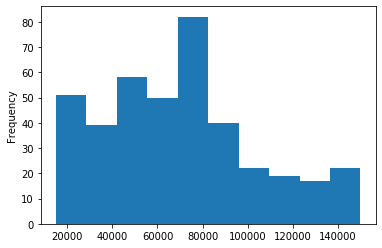

In [11]:
#comparing count of Salary Range
Suv_Dataset['EstimatedSalary'].plot.hist()

In [12]:
##Changing Categorical variable to Dummy variable
sex=pd.get_dummies(Suv_Dataset['Gender'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [13]:
Suv_Dataset=pd.concat([Suv_Dataset,sex],axis=1)
Suv_Dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [14]:
Suv_Dataset.drop(['User ID','Gender'],axis=1,inplace=True)

In [15]:
Suv_Dataset.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [16]:
X=Suv_Dataset.drop('Purchased',axis=1)#indipendent Variable
y=Suv_Dataset['Purchased']#Dependet Variable

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
#training and testing data using Logistic regression
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel=LogisticRegression(random_state=0)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction=logmodel.predict(X_test)

In [22]:
#Testing the Model 
#classification report
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94        58\n           1       0.89      0.77      0.83        22\n\n    accuracy                           0.91        80\n   macro avg       0.91      0.87      0.89        80\nweighted avg       0.91      0.91      0.91        80\n'

In [23]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [24]:
#Accurrecy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)*100

91.25

In [25]:
#Using Descision Tree classifier
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
treeModel=DecisionTreeClassifier(random_state=0)
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
prediction=treeModel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93        58\n           1       0.79      0.86      0.83        22\n\n    accuracy                           0.90        80\n   macro avg       0.87      0.89      0.88        80\nweighted avg       0.90      0.90      0.90        80\n'

In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[53,  5],
       [ 3, 19]], dtype=int64)

In [30]:
#Accurrecy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)*100

90.0